# Data Applications Project by Skye and Greg

**Our problem is: we want to see if we can come up with a model that can accurately predict a food's type category based on the food macros**

*Import libraries*

In [606]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Import/Read Data**

In [527]:
df = pd.read_csv('data/daily_food_nutrition_dataset.csv')
df.head()

,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
0,2024-09-11,496,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,Lunch,478
1,2024-12-17,201,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,Lunch,466
2,2024-06-09,776,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,Breakfast,635
3,2024-08-27,112,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,Snack,379
4,2024-07-28,622,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,Lunch,471


**Drop any rows with missing values (if any exist) and remove duplicate rows (if any)**

In [530]:
df = df.dropna()
df = df.drop_duplicates()

**Determine shape - number of columns and rows working with**

In [532]:
df.shape

(10000, 14)

**Drop all unneccesary columns**

In [536]:
df_clean = df.drop(columns=['Date', 'User_ID', 'Meal_Type', 'Food_Item','Water_Intake (ml)'])
df_clean.head(5)

,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg)
0,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125
1,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97
2,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157
3,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13
4,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148


**Plot number of items per Category type**

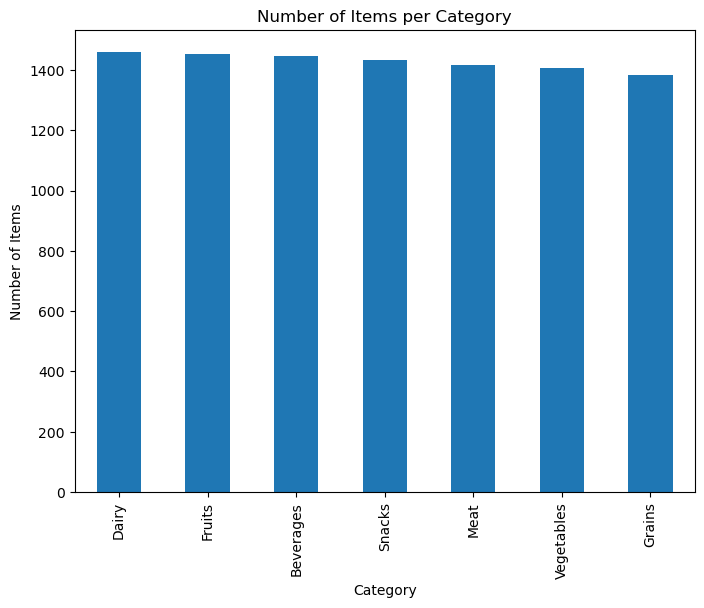

In [600]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')

plt.title('Number of Items per Category')
plt.xlabel('Category')
plt.ylabel('Number of Items')
plt.xticks(rotation=90)
plt.show()

**Plot basic macro to Category; Average Calories**

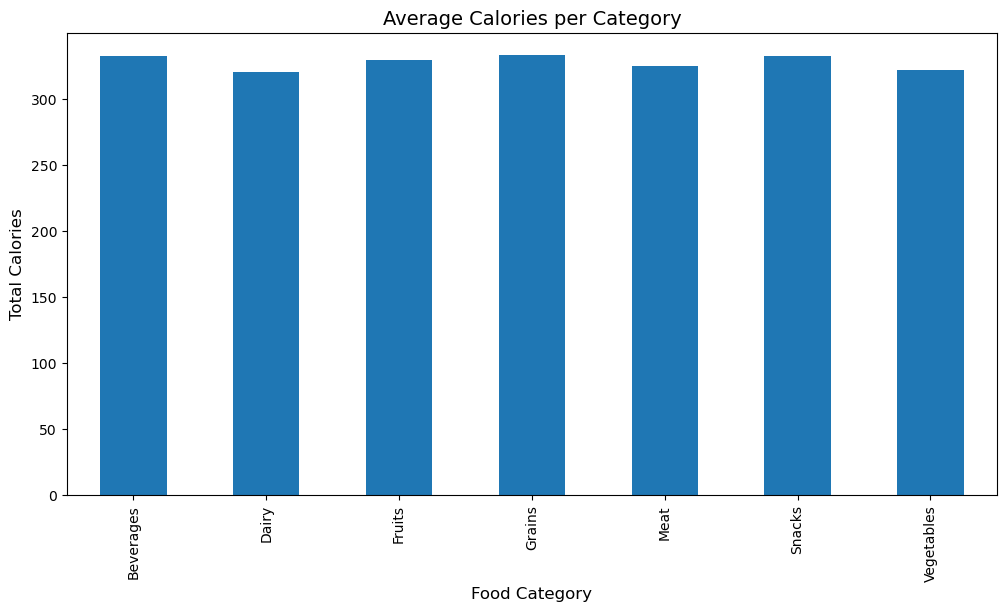

In [602]:
df_grouped = df.groupby('Category')['Calories (kcal)'].mean()

plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar')

plt.title("Average Calories per Category", fontsize=14)
plt.xlabel("Food Category", fontsize=12)
plt.ylabel("Total Calories", fontsize=12)
plt.xticks(rotation=90)
plt.show()

**Determine number of Categories labels and Category label names as well as reassigned each label to an integer 0-6**

In [534]:
df.Category.unique()

array(['Meat', 'Fruits', 'Grains', 'Vegetables', 'Snacks', 'Beverages',
       'Dairy'], dtype=object)

In [538]:
category_mapping = {
    'Meat': 0,
    'Fruits': 1,
    'Grains': 2,
    'Vegetables': 3,
    'Snacks': 4,
    'Beverages': 5,
    'Dairy': 6
}

df_clean['Category'] = df_clean['Category'].map(category_mapping)

df_clean.head()

,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg)
0,0,173,42.4,83.7,1.5,1.5,12.7,752,125
1,1,66,39.2,13.8,3.2,2.6,12.2,680,97
2,0,226,27.1,79.1,25.8,3.2,44.7,295,157
3,1,116,43.4,47.1,16.1,6.5,44.1,307,13
4,1,500,33.9,75.8,47.0,7.8,19.4,358,148


**Plot correlation through a confusion matrix**

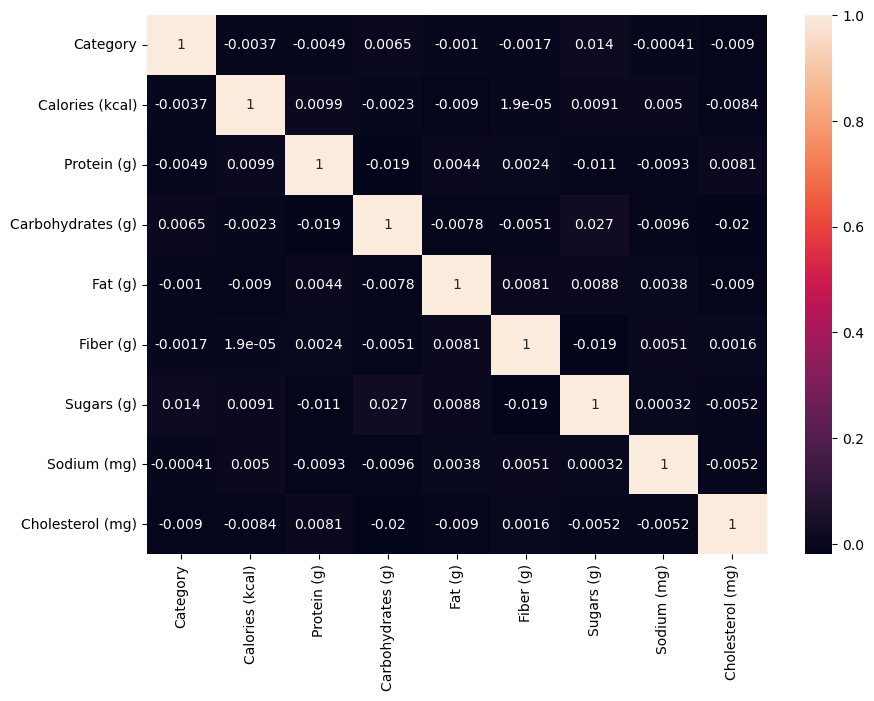

In [579]:
import seaborn as sn

plt.figure(figsize=(10, 7))
dataplot = sn.heatmap(df_clean.corr(),annot=True)
  
plt.show()

**Scatterplot further correlation**

In [614]:
scaler=StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

pca = PCA(n_components=2)
pdata = pca.fit_transform(df_scaled)

arrdata = np.array(pdata)
filterdata = arrdata[:,1:]
model = KMeans(7)
model.fit(filterdata)

KMeans(n_clusters=7)

In [616]:
labels = model.labels_

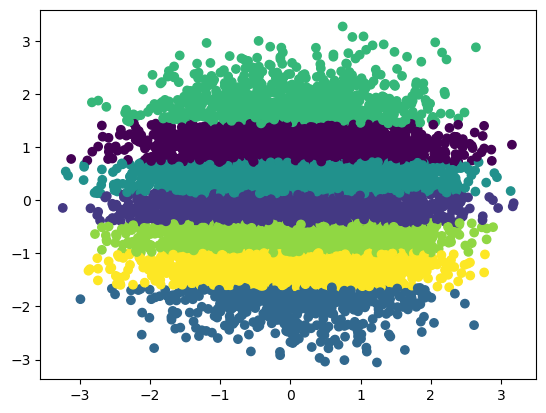

In [618]:
plt.scatter(pdata[:,0],pdata[:,1],c=labels)

**Further clean data by removing Category column and only leave macros for training/testing**

In [542]:
data = df_clean.drop(columns=['Category'])

**Set the variables based off the cleaned data and necessary Category columns**

In [545]:
X = data
y = df_clean['Category']

**Split the dataset into training and test sets (80/20 split)**

In [548]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

**Scale the features using StandardScaler**

In [551]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Train the model**

In [554]:
model = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=0)

 **Make predictions on the test set**

In [557]:
y_pred = model.predict(X_test_scaled)

**Show accuracy of model**

In [560]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.1515


**We have an accuracy score of 15%, this means our model did not do too well. We think this is due to the data itself as the serving size to show the specific data for said food is an unseen variable. For example Banana can be seen twice in the data but has different data assiocated with because of the size serving taken; one is labeled snack and the other as lunch.**

**We make a confusion matrix to understand what was predicted accurately**

In [563]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[12 71  9 77 48 36 40]
 [11 72  7 63 57 34 36]
 [12 77 12 56 50 39 35]
 [16 71  4 55 41 41 39]
 [13 73  6 63 55 38 32]
 [15 81  4 70 55 37 34]
 [18 78  2 67 41 37 60]]


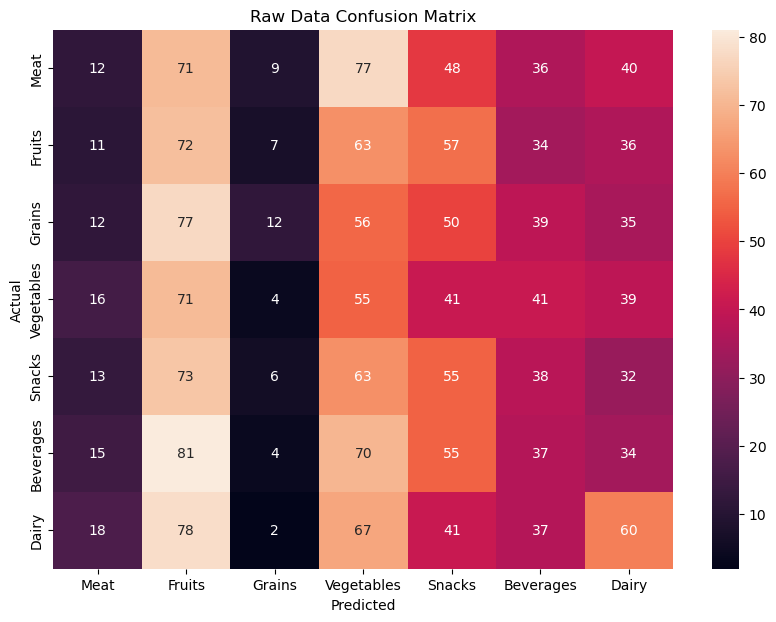

In [565]:
labels = df['Category'].unique()
conf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(conf_matrix, index = [i for i in labels], columns = [i for i in labels])

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Raw Data Confusion Matrix')
plt.show()

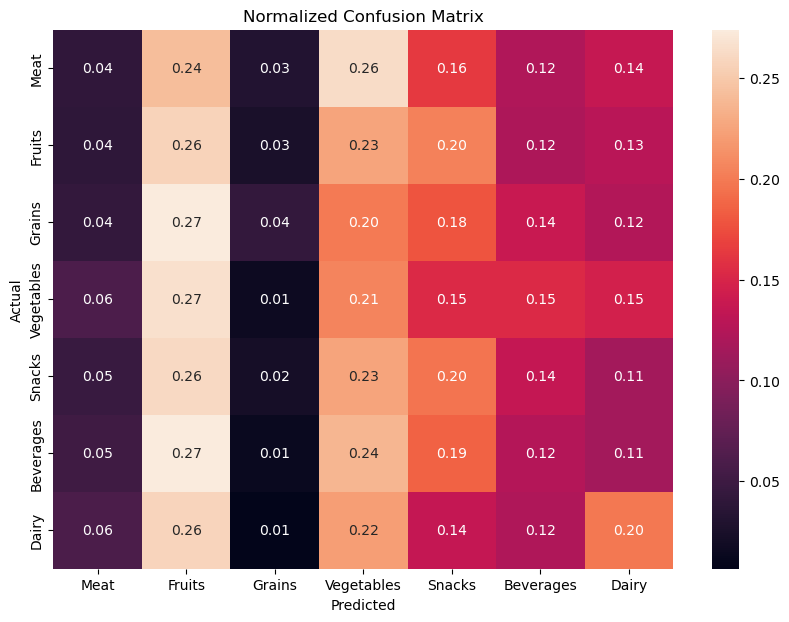

In [567]:
numClasses = 7
labels = df['Category'].unique()
conf = np.zeros([numClasses, numClasses])

for i in range(len(y_test)):
    real = y_test.iloc[i]
    guess = y_pred[i]
    conf[real, guess] += 1

rowsums = np.sum(conf, axis=1)
rowsums = np.reshape(rowsums, [numClasses, 1])
rowsums = np.repeat(rowsums, numClasses, axis=1)
conf = conf / rowsums
df_cm = pd.DataFrame(conf, index = [i for i in labels], columns = [i for i in labels])

plt.figure(figsize=(10, 7))
sn.heatmap(df_cm, annot=True, fmt=".2f")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Normalized Confusion Matrix')
plt.show()